# Creadit Fraud EDA

This dataset presents transactions that occurred in two days, where we have **305** frauds out of 170,884 transactions. The dataset is highly **Imbalanced**, the positive class (frauds) account for **0.178%** of all transactions.

The dataset includes only numerical input variables resulting from a PCA transformation. Due to confidentiality reasons, the original features and background information about the data are not provided.

Features:

- PCA Components (V1, V2, ..., V28): These are the principal components obtained from a PCA transformation, likely derived from original features that have been anonymized for confidentiality reasons.

- Time: Represents the seconds elapsed between each transaction and the first transaction in the dataset.

- Amount: The transaction amount, which can be used for cost-sensitive learning.

- Class: The target variable, with 1 indicating fraud and 0 indicating non-fraud.


------------

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

import plotly.graph_objects as go 
import plotly.io as pio 
import plotly.colors as colors

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Set the maximum number of columns to display
pd.options.display.max_columns = None
# Set the maximum number of rows to display
pd.options.display.max_rows = 10

plt.rc("figure", figsize=(22, 8))

## Read Data


In [237]:
train= pd.read_csv('./data/train.csv')

In [238]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,0.293539,0.427682,0.504109,-0.989043,0.761661,-0.984511,-0.296433,-0.336666,-0.231668,0.544180,-0.269148,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,-0.143353,-0.947576,-0.541060,-0.817426,0.564658,1.276676,0.046158,-0.176105,-0.676223,0.038731,-0.033806,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,1.057386,-1.317899,-0.768390,-1.081373,0.133451,0.447815,0.575453,-0.158101,-0.903597,-2.798035,0.509795,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,-0.363315,-1.072917,0.252020,-1.155591,0.742563,0.338738,0.094420,0.990406,-0.371517,-0.390559,-0.096924,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,-0.228237,-1.002326,0.639557,0.671282,-0.212945,-0.237918,-0.161859,-0.182514,-0.619759,0.389821,0.011447,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


## Check Data


In [239]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,-0.001031,0.000433,0.000659,-0.000806,-0.000532,-0.000266,-0.000419,0.001986,-0.001057,0.000185,-0.001071,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,1.085747,1.021278,0.998322,0.994507,0.957929,0.914388,0.879342,0.853936,0.839921,0.814127,0.778423,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,-24.588262,-4.682931,-18.683715,-5.791881,-18.822087,-4.391307,-14.129855,-24.019099,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,-0.537197,-0.763216,-0.403837,-0.649292,-0.426709,-0.582621,-0.468483,-0.484007,-0.500152,-0.454859,-0.211713,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,-0.094376,-0.029338,0.140076,-0.016291,0.050488,0.045489,0.066737,-0.064871,-0.005566,0.003222,-0.062696,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,0.451011,0.741291,0.618087,0.662032,0.492867,0.647375,0.523409,0.403348,0.499790,0.458767,0.133128,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,15.331742,11.669205,7.848392,7.126883,10.526766,8.877742,17.315112,9.207059,5.041069,5.572113,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


In [240]:
print("Credit Card Fraud Detection data -  rows:",train.shape[0]," columns:", train.shape[1])


Credit Card Fraud Detection data -  rows: 170884  columns: 31


In [241]:
# Class distribution
class_counts = train['Class'].value_counts()
print(f"Class Distribution: \n{class_counts}")
print(f"Fraudulent Transactions Percentage: {class_counts[1] / len(train) * 100:.3f}%")


Class Distribution: 
0    170579
1       305
Name: Class, dtype: int64
Fraudulent Transactions Percentage: 0.178%


In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

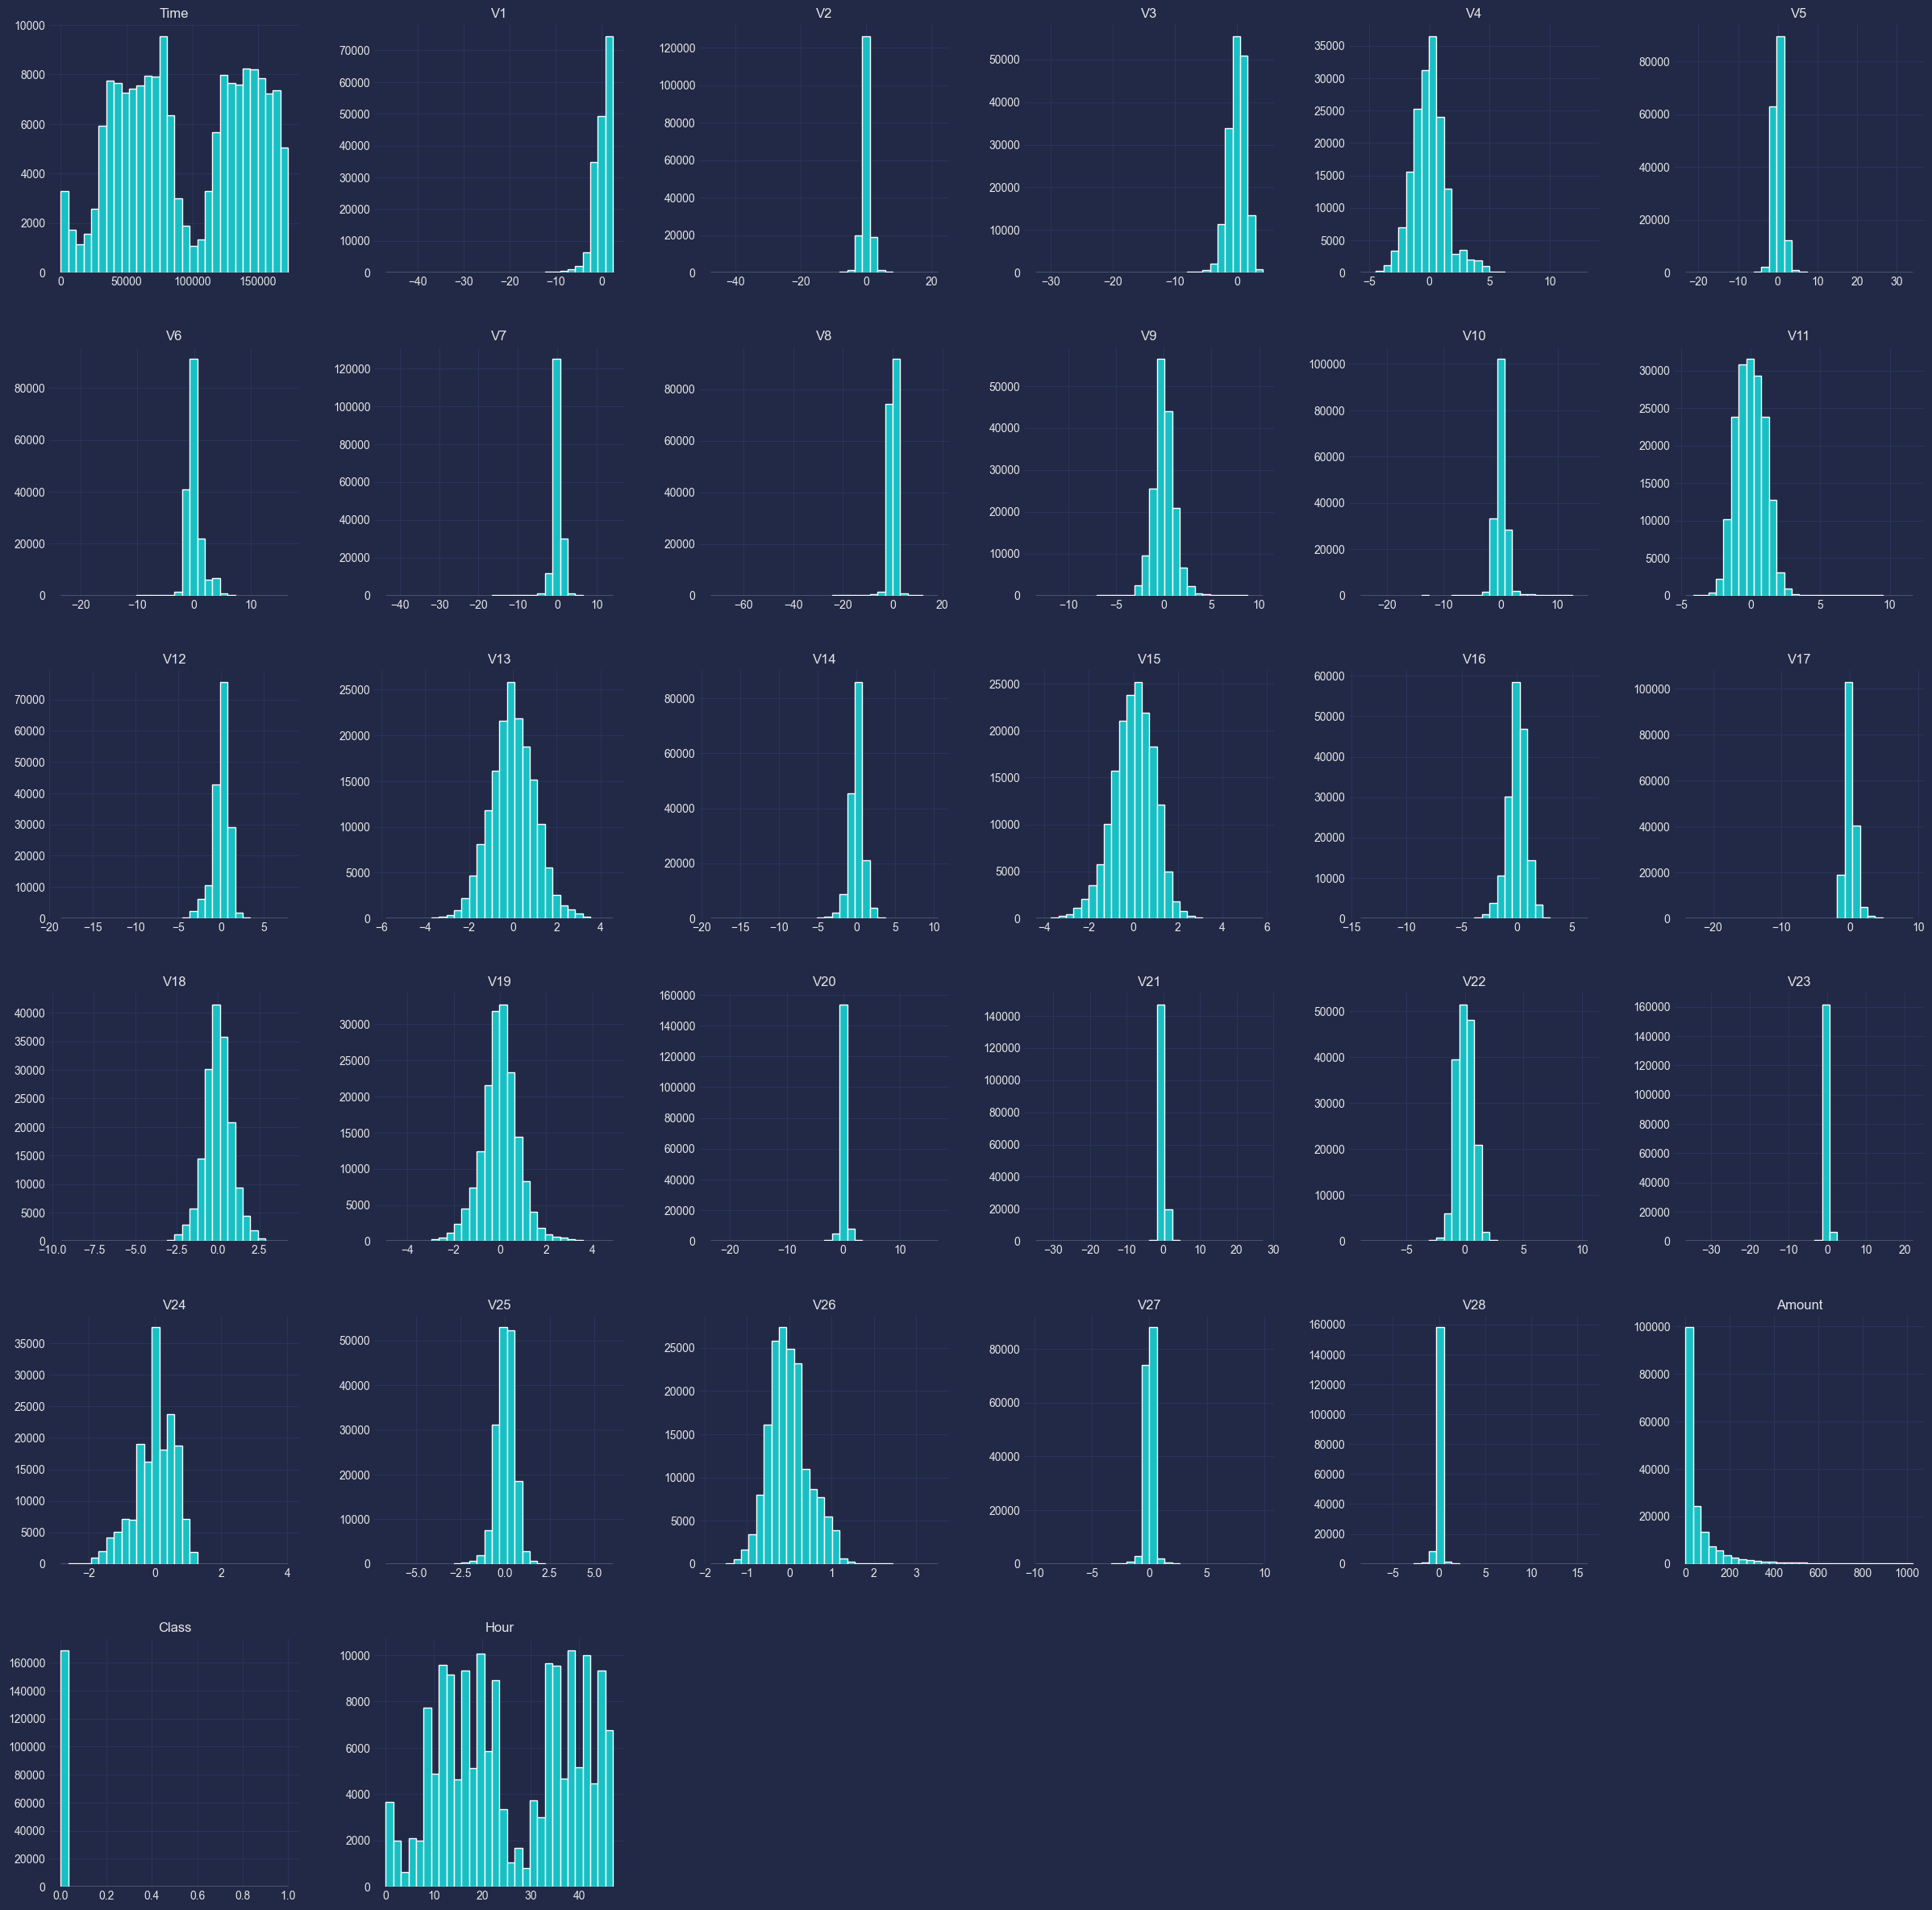

In [269]:
train.hist(bins=30,figsize=(30,30))
plt.show()

### Missing Data


In [243]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
# Assuming train is already defined
temp = train["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index, 'values': temp.values})
mapping = {0:'Not fraud',  1:'Fraud'}
df['Class'] = df['Class'].map(mapping)
trace = go.Bar(
    x=df['Class'],
    y=df['values'],
    name="Credit Card Fraud Class",
    marker=dict(color="#BBD8F2"),
    text=df['values']
)

data = [trace]
layout = dict(
    title='Credit Card Fraud Class',
    xaxis=dict(title='Class', showticklabels=True, categoryorder='total descending'), 
    yaxis=dict(title='Number of transactions'),
    hovermode='closest',
    plot_bgcolor='#011F26',  
    paper_bgcolor='#011F26',
    font=dict(color='white'), 
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [245]:
df

,Class,values
0,Not fraud,170579
1,Fraud,305


## Data Exploration


In [246]:
import plotly.figure_factory as ff

class_0 = train.loc[train['Class'] == 0]["Time"]
class_1 = train.loc[train['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

colors = ['#1f77b4', '#D96055'] 

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False, colors=colors)

fig.update_layout(
    title='Credit Card Transactions Time Density Plot',
    xaxis=dict(title='Time [s]'),
    plot_bgcolor='#011F26',
    paper_bgcolor='#011F26',
    font=dict(color='white')
)

fig.show()


The density plot indicates that

- non-fraudulent transactions (blue line) exhibit distinct peaks at specific times, particularly around 80,000 to 100,000 seconds and 140,000 to 160,000 seconds.
- fraudulent transactions (Red line) are more evenly distributed but show noticeable peaks around 40,000 to 60,000 seconds and 120,000 to 140,000 seconds.

These different time distributions suggest that transaction timing could serve as a distinguishing factor between fraud and non-fraud.


### Analyze the distribution of transaction amounts for both fraud and non-fraud transactions.


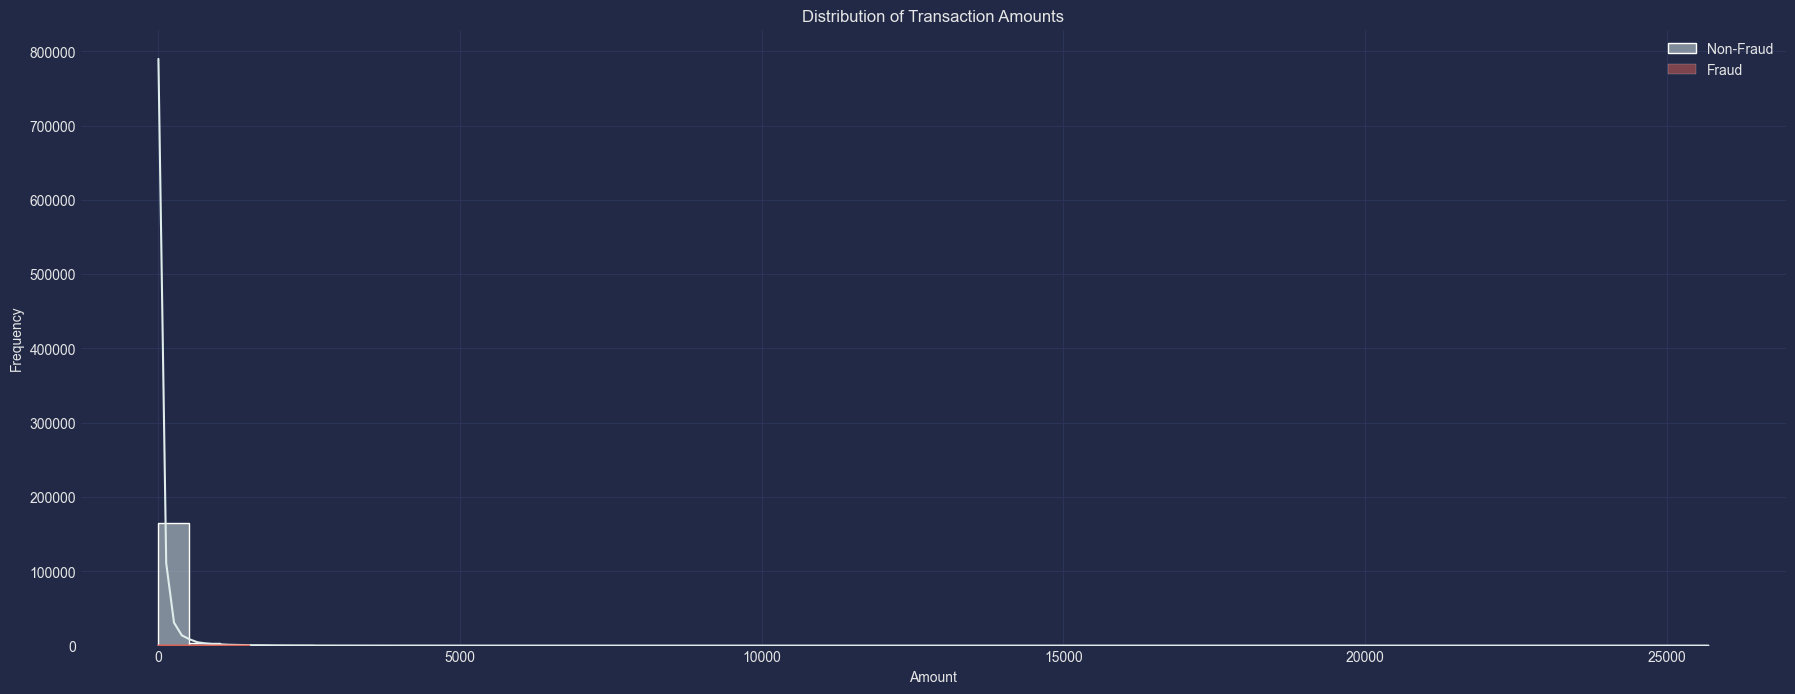

In [247]:
sns.histplot(train[train['Class'] == 0]['Amount'], bins=50, kde=True, color='#DEEDEB', label='Non-Fraud')
sns.histplot(train[train['Class'] == 1]['Amount'], bins=50, kde=True, color='#D96055', label='Fraud')
plt.legend()
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

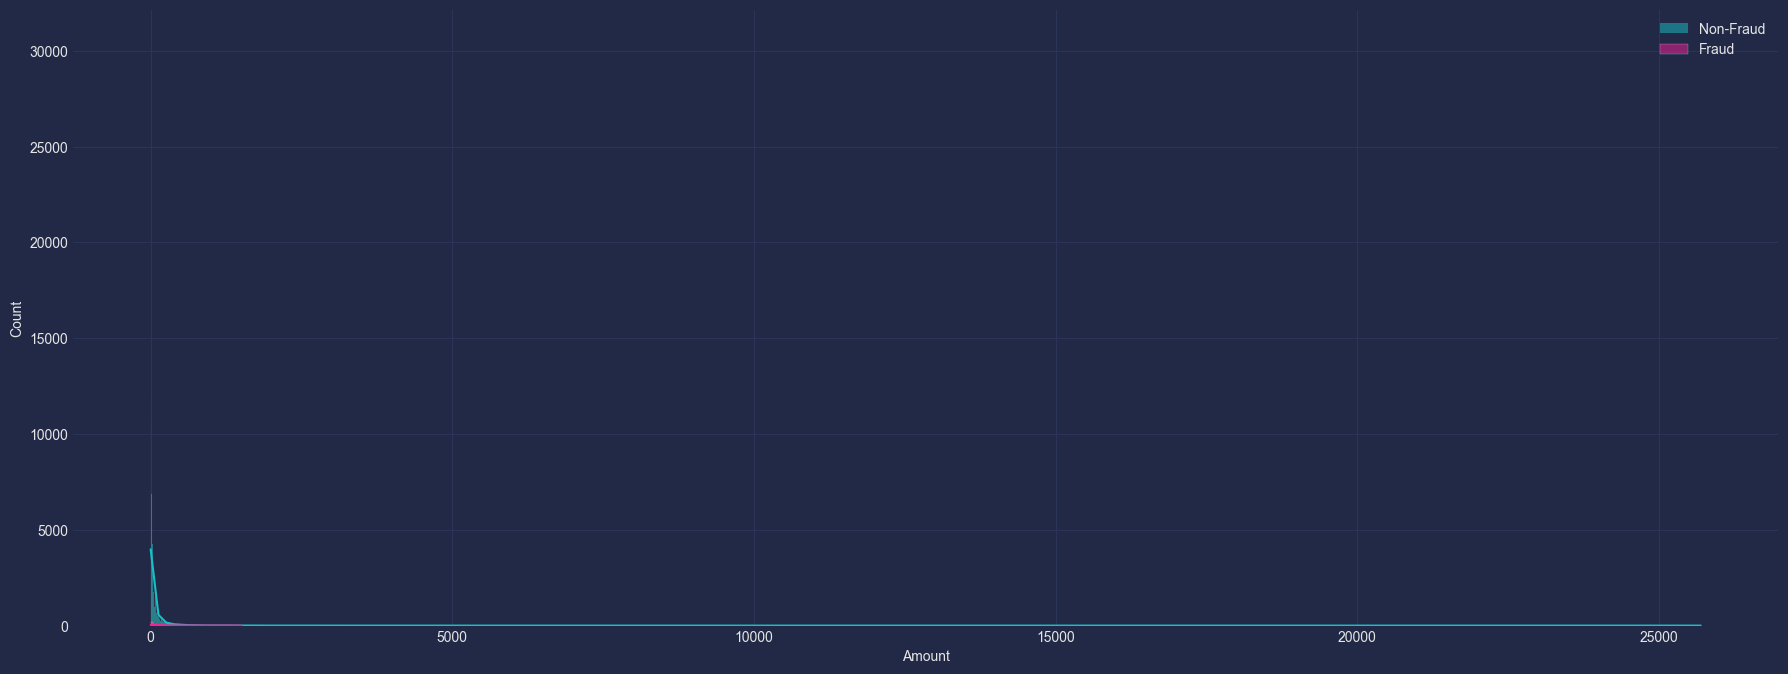

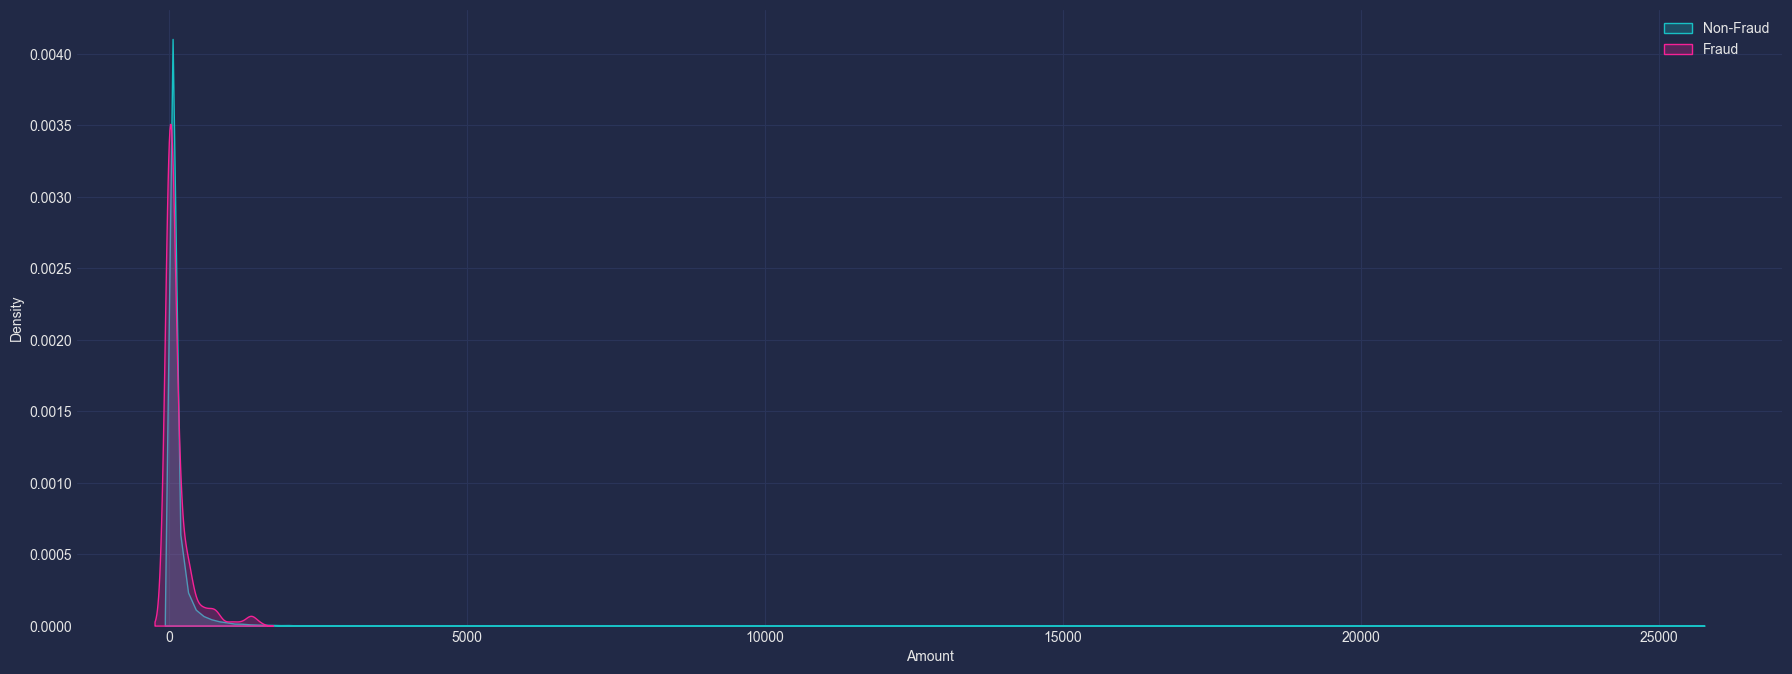

In [248]:
# Histogram
sns.histplot(train[train['Class'] == 0]['Amount'], label='Non-Fraud', kde=True)
sns.histplot(train[train['Class'] == 1]['Amount'], label='Fraud', kde=True)
plt.legend()
plt.show()

# Density plot
sns.kdeplot(train[train['Class'] == 0]['Amount'], label='Non-Fraud', shade=True)
sns.kdeplot(train[train['Class'] == 1]['Amount'], label='Fraud', shade=True)
plt.legend()
plt.show()


In [249]:
train[train['Class'] == 0]['Amount'].value_counts().sort_index(ascending=False)


25691.16       1
19656.53       1
18910.00       1
12910.93       1
11898.09       1
            ... 
0.05          25
0.04           6
0.02          59
0.01         427
0.00        1052
Name: Amount, Length: 25313, dtype: int64

In [250]:
train['Amount'].describe()

count    170884.000000
mean         88.511723
std         256.737144
min           0.000000
25%           5.637500
50%          22.020000
75%          77.650000
max       25691.160000
Name: Amount, dtype: float64

In [251]:
threshold_99 = train['Amount'].quantile(0.99)

Q1 = train['Amount'].quantile(0.25)
Q3 = train['Amount'].quantile(0.75)
IQR = Q3 - Q1
threshold_IQR = Q3 + 1.5 * IQR

chosen_threshold = threshold_99  

# Filter the data
filtered_data = train[(train['Amount'] <= chosen_threshold) ]


filtered_data["Class"].value_counts()
train = filtered_data

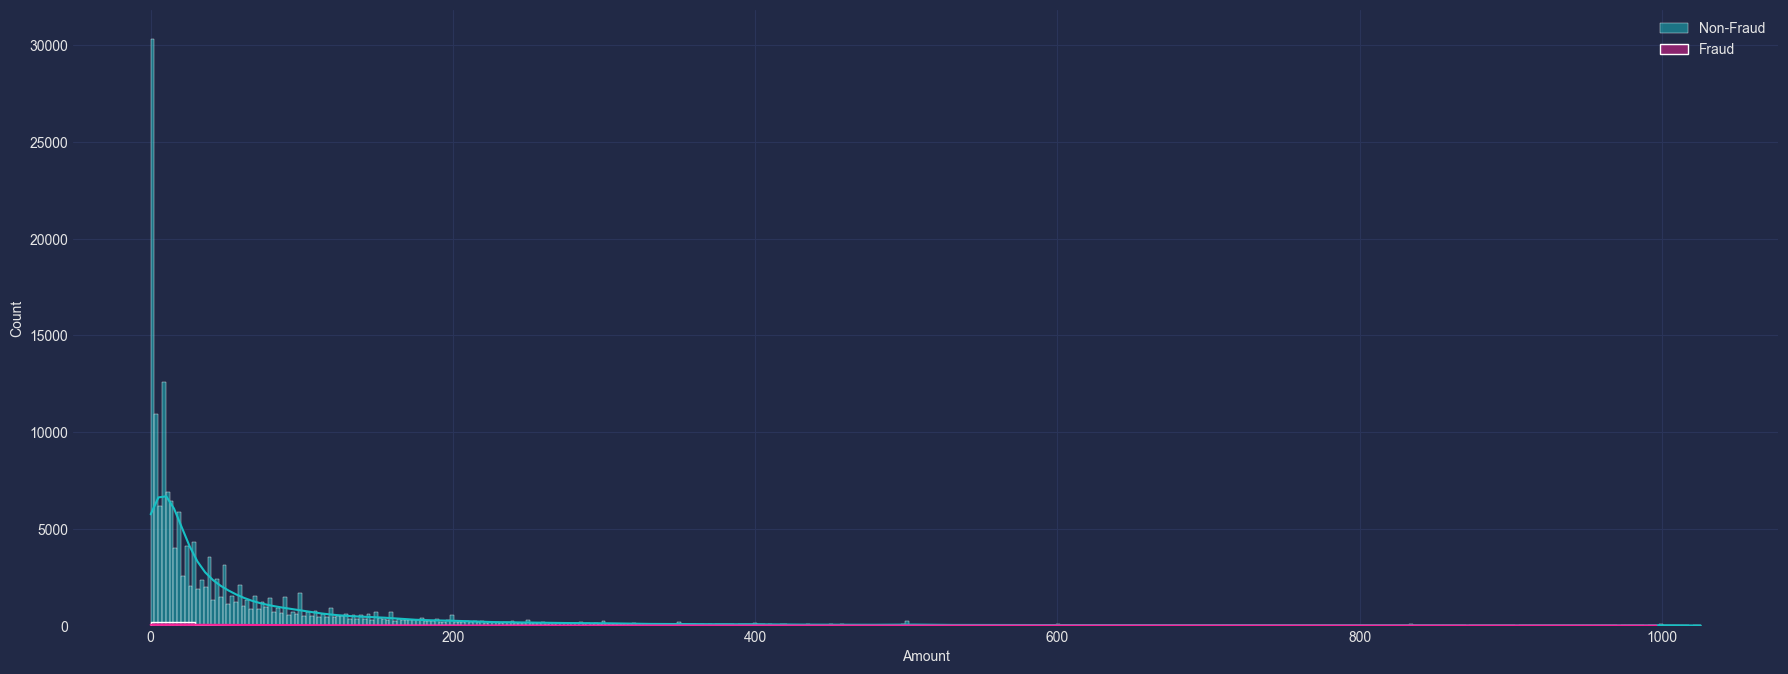

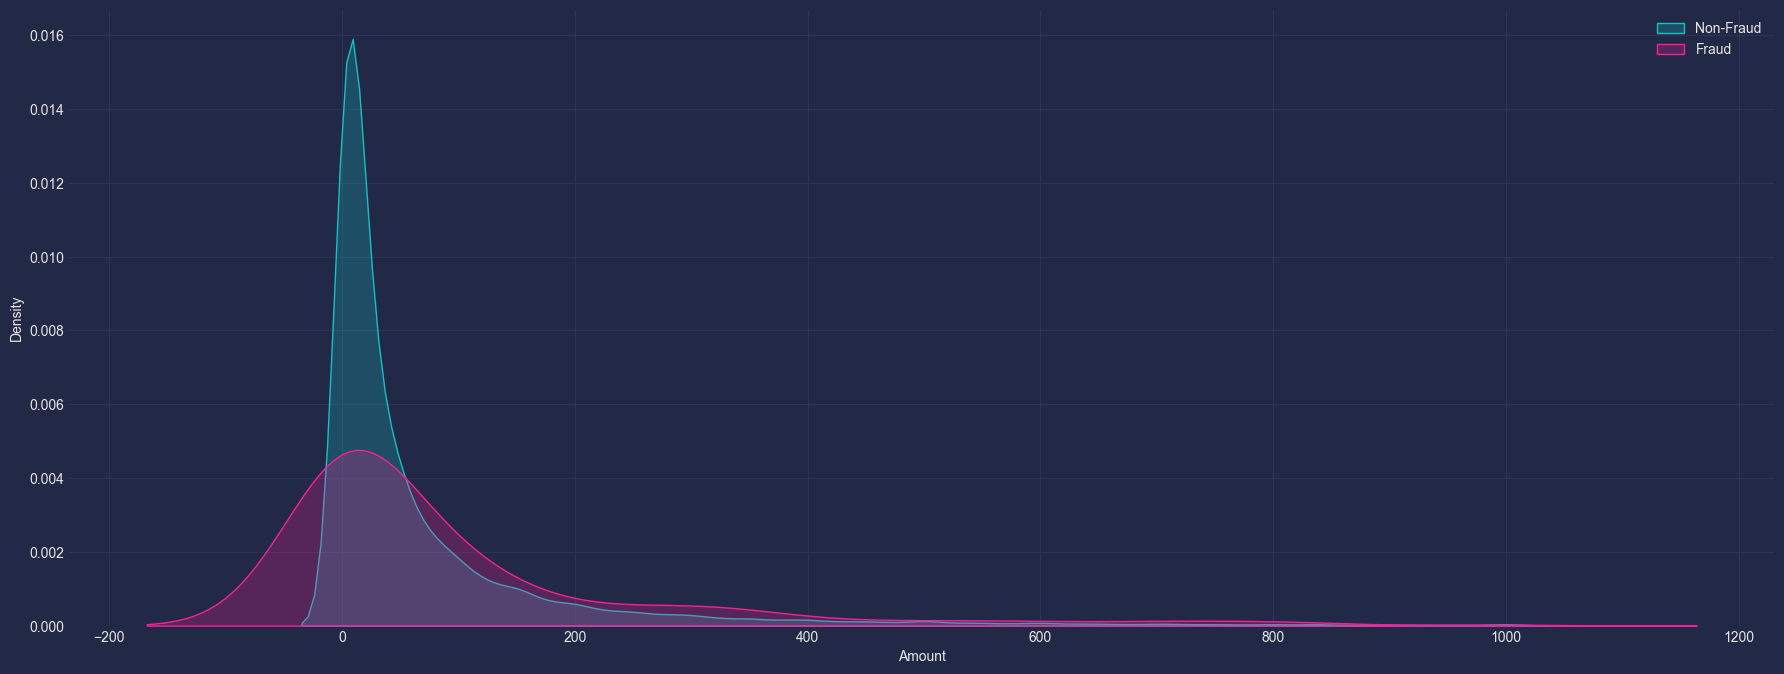

In [252]:
sns.histplot(train[train['Class'] == 0]['Amount'], label='Non-Fraud', kde=True)
sns.histplot(train[train['Class'] == 1]['Amount'], label='Fraud', kde=True)
plt.legend()
plt.show()

sns.kdeplot(train[train['Class'] == 0]['Amount'], label='Non-Fraud', shade=True)
sns.kdeplot(train[train['Class'] == 1]['Amount'], label='Fraud', shade=True)
plt.legend()
plt.show()

In [253]:
train['Hour'] = train['Time'].apply(lambda x: np.floor(x / 3600))

tmp = train.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,986.31,2344,125292.81,53.452564,12.970,12079.023173
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1000.00,1302,78529.01,60.314140,23.825,11612.795210
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,855.15,929,53147.92,57.209817,17.290,12746.738170


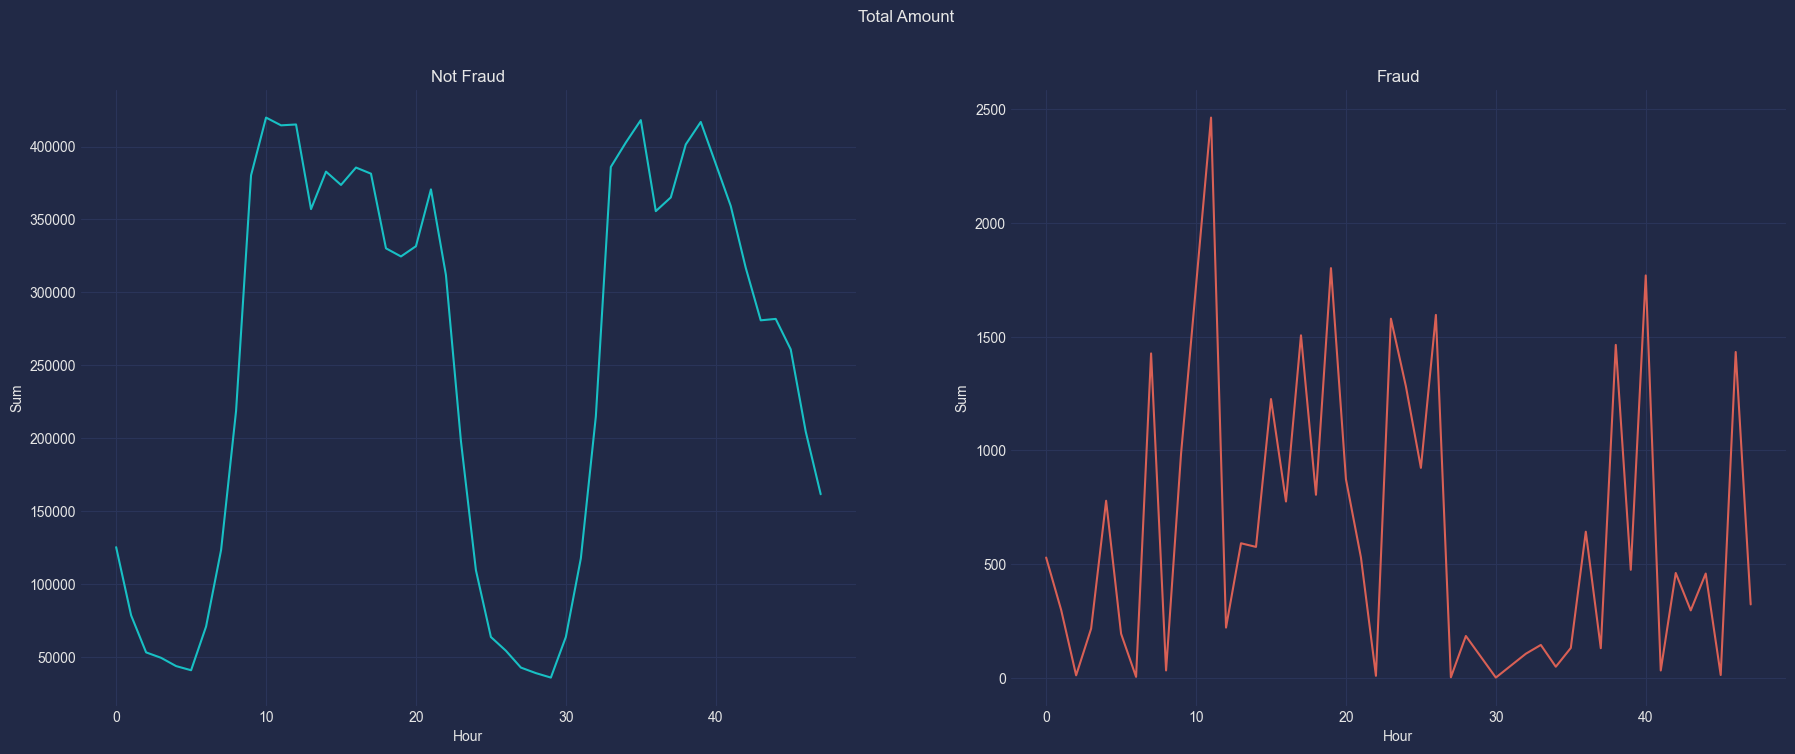

In [254]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
ax1.set_title("Not Fraud")
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="#D96055")
ax2.set_title("Fraud")
plt.suptitle("Total Amount")
plt.show();

**Non-Fraudulent Transactions**

- **Significant Fluctuations:** The graph exhibits substantial variations in the total amount of non-fraudulent transactions over time.
- **Peak Periods:** There appear to be several peak periods where the total amount reaches its highest points. These peaks suggest high transaction volumes during those specific times.
- **Overall Trend:** Without a clear baseline or comparison point, it's difficult to determine an overall trend. However, the graph indicates periods of high and low activity.

**Fraudulent Transactions**

- **Lower Volume:** Compared to non-fraudulent transactions, the total amount of fraudulent transactions is significantly lower.
- **Higher Volatility:** The fraudulent transaction graph displays more volatility with sharp spikes and drops, suggesting irregular patterns.
- **Potential Outliers:** Some data points on the fraudulent transaction graph might be outliers that require further investigation.


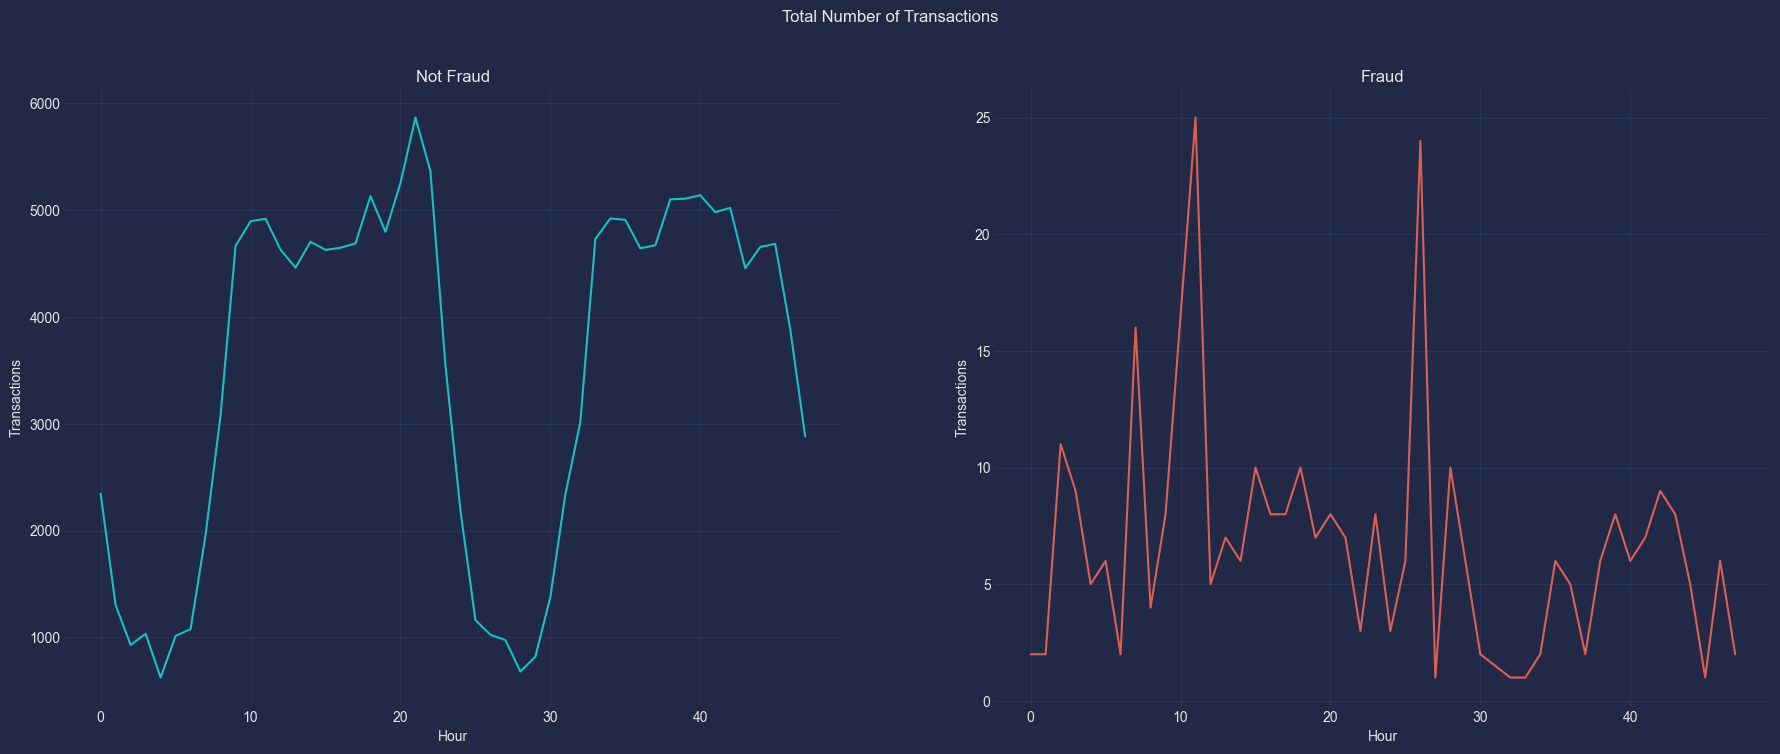

In [255]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
ax1.set_title("Not Fraud")
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="#D96055")
ax2.set_title("Fraud")
plt.suptitle("Total Number of Transactions")
plt.show();

**Non-Fraudulent Transactions**

- **Clear Diurnal Pattern:** There's a pronounced cyclical pattern with distinct peaks and troughs throughout the day.
- **Peak Activity:** The highest number of non-fraudulent transactions occurs between hours 25 and 35, suggesting a potential afternoon peak.
- **Low Activity:** The lowest point is around hour 10, indicating a period of minimal activity.
- **Overall Volume:** The volume of non-fraudulent transactions is significantly higher than fraudulent transactions, as expected.

**Fraudulent Transactions**

- **Irregular Pattern:** The graph displays a more erratic pattern with sharp spikes and sudden drops.
- **Peak Activity:** While there's no consistent peak, several notable spikes occur around hours 5, 25, and 40.
- **Low Activity:** Periods of minimal fraudulent activity are interspersed throughout the day.
- **Overall Volume:** The volume of fraudulent transactions is considerably lower compared to non-fraudulent ones.


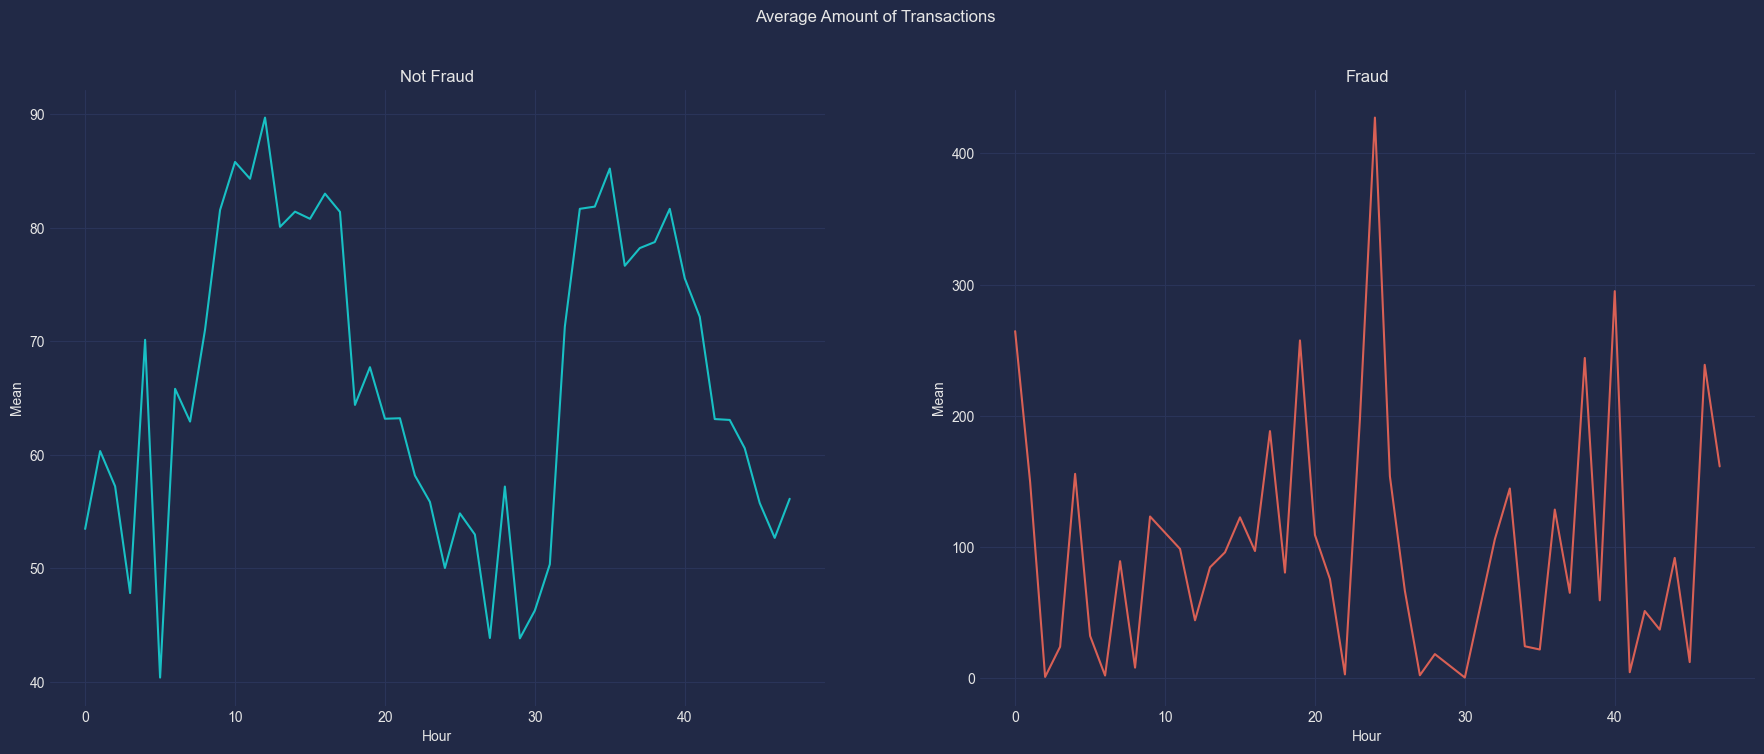

In [256]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
ax1.set_title("Not Fraud")
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="#D96055")
ax2.set_title("Fraud")
plt.suptitle("Average Amount of Transactions")
plt.show();

**non-fraudulent transactions:**

- The average amount fluctuates throughout the day, but stays within a certain range.
- There are periods of slightly higher and lower average amounts.

**fraudulent transactions:**

- The average amount is much more volatile, with sharp spikes and drops.
- There are several points where the average amount is significantly higher than usual, which could be considered outliers.
- Overall, the average amount for fraudulent transactions is lower than for non-fraudulent transactions.


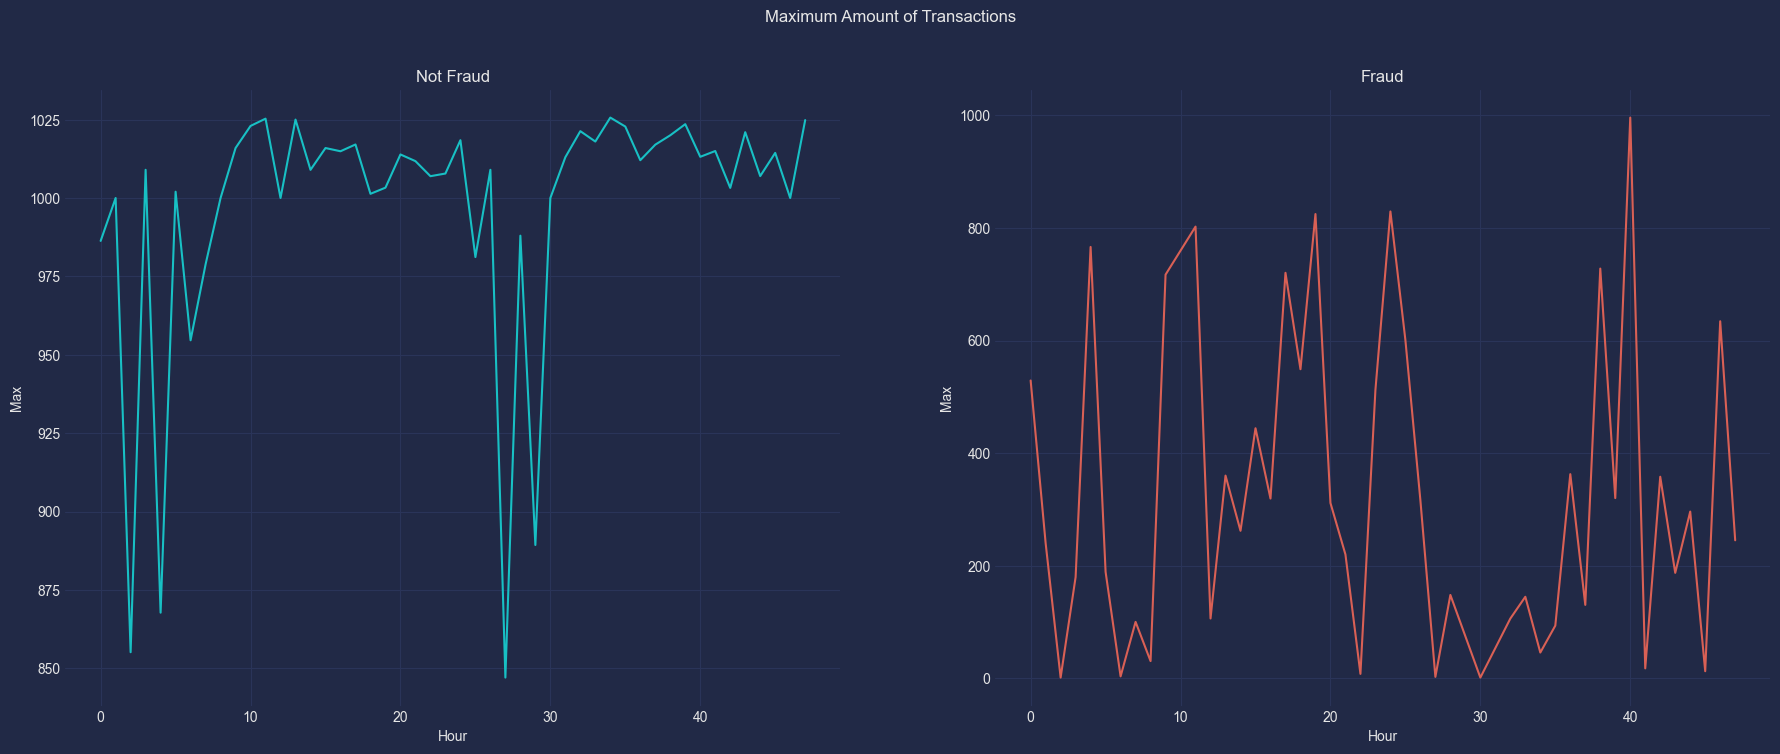

In [257]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
ax1.set_title("Not Fraud")
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="#D96055")
ax2.set_title("Fraud")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

**Non-Fraudulent Transactions:**

- **Consistent Fluctuations:** The graph shows a relatively consistent pattern of peaks and valleys in transaction amounts.
- **Range:** The maximum amount for non-fraudulent transactions stays within a specific range throughout the observed period.
- **No Clear Trend:** There doesn't appear to be a significant upward or downward trend in the overall maximum amount.

**Fraudulent Transactions:**

- **High Volatility:** The graph exhibits extreme fluctuations with sharp spikes and drops in transaction amounts.
- **Outliers:** Several data points significantly deviate from the general pattern, indicating potential anomalies or outliers.
- **Lower Overall Values:** Compared to non-fraudulent transactions, the maximum amounts for fraudulent transactions are generally lower.


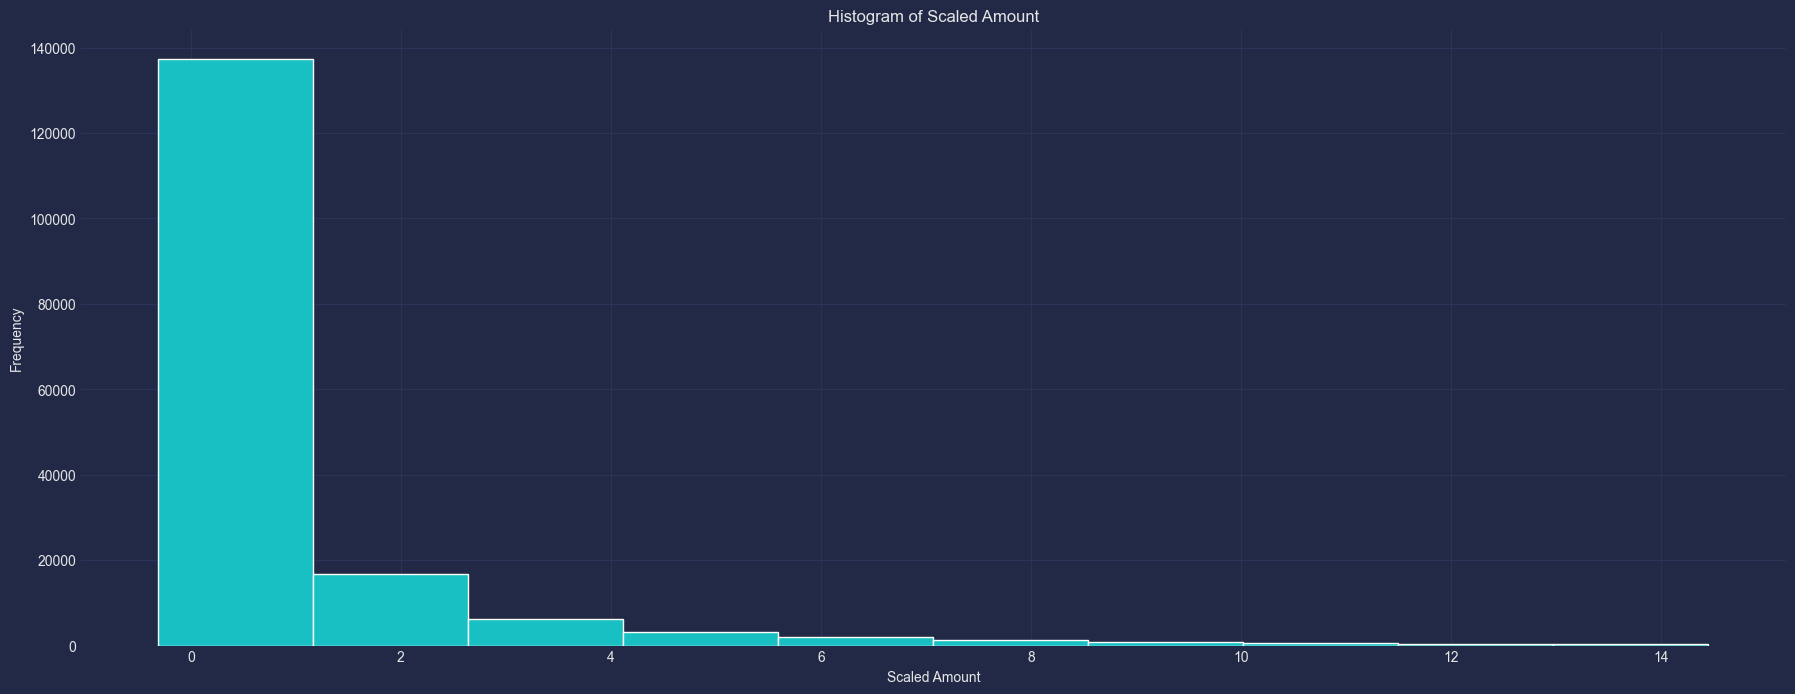

In [274]:
from sklearn.preprocessing import RobustScaler
temp_train = train.copy()
scaler = RobustScaler()

# Apply the scaler to the 'Amount' column
temp_train['Amount'] = scaler.fit_transform(temp_train['Amount'].to_numpy().reshape(-1, 1))

# Plot the histogram of the scaled 'Amount' feature
temp_train['Amount'].hist()
plt.title('Histogram of Scaled Amount')
plt.xlabel('Scaled Amount')
plt.ylabel('Frequency')
plt.show()

## Transactions amount


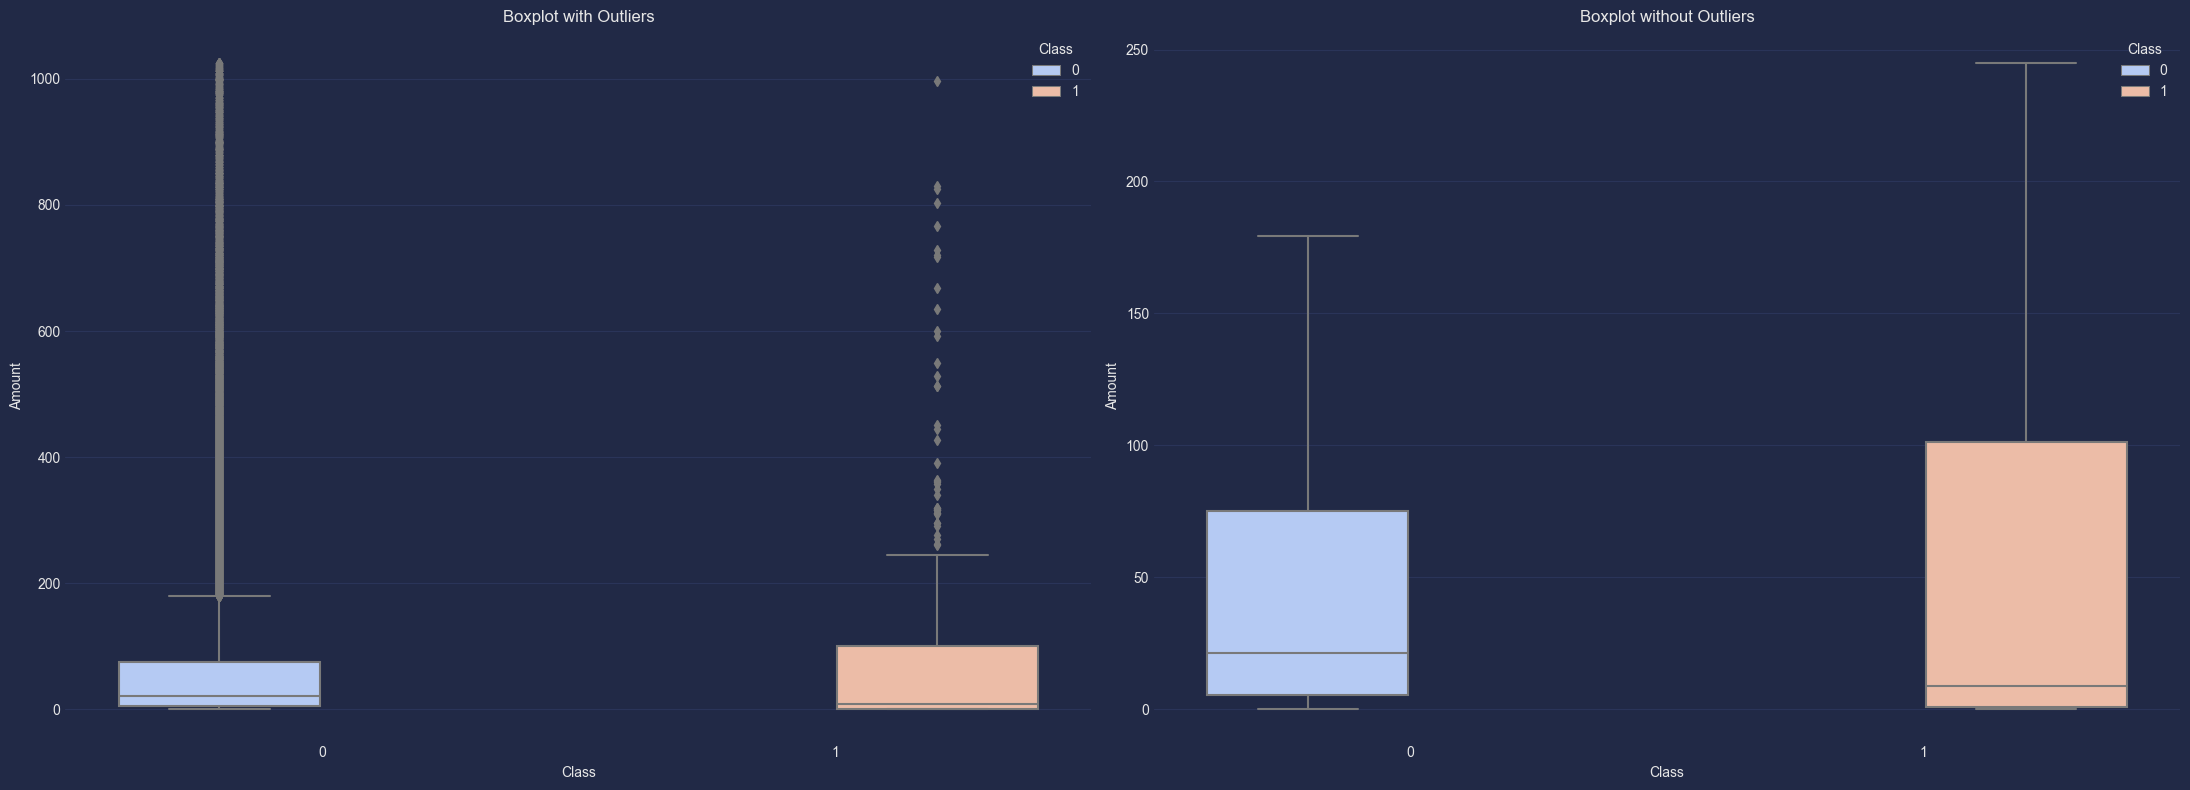

In [258]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
# Boxplot with outliers
sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=train, palette="coolwarm", showfliers=True)
ax1.set_title('Boxplot with Outliers')

# Boxplot without outliers
sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class", data=train, palette="coolwarm", showfliers=False)
ax2.set_title('Boxplot without Outliers')

# Display the plots
plt.tight_layout()
plt.show()

In [259]:
tmp = train[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    168877.000000
mean         70.602645
std         128.667932
min           0.000000
25%           5.490000
50%          21.410000
75%          74.960000
max        1025.640000
Name: Amount, dtype: float64

In [260]:
class_1.describe()

count    298.000000
mean      98.511007
std      174.581964
min        0.000000
25%        1.000000
50%        8.835000
75%      101.122500
max      996.270000
Name: Amount, dtype: float64

In [261]:
from plotly.offline import iplot

# Filter fraudulent transactions
fraud = train.loc[train['Class'] == 1]

# Create the scatter plot
trace = go.Scatter(
    x=fraud['Time'],
    y=fraud['Amount'],
    name="Fraudulent Transactions",
    marker=dict(
        color='#D96055',  # Marker color
        line=dict(
            color='red',  # Border color
            width=1
        ),
        opacity=0.5
    ),
    text=fraud['Amount'],  # Text to display on hover
    mode="markers"  # Display as markers
)

# Layout for the plot
layout = go.Layout(
    title='Amount of Fraudulent Transactions',
    xaxis=dict(
        title='Time [s]', 
        showticklabels=True
    ),
    yaxis=dict(
        title='Amount'
    ),
    hovermode='closest',
    plot_bgcolor='#011F26',
    paper_bgcolor='#011F26',
    font=dict(color='white')
)

# Create the figure and plot it
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, filename='fraud-amount')


## Features correlation


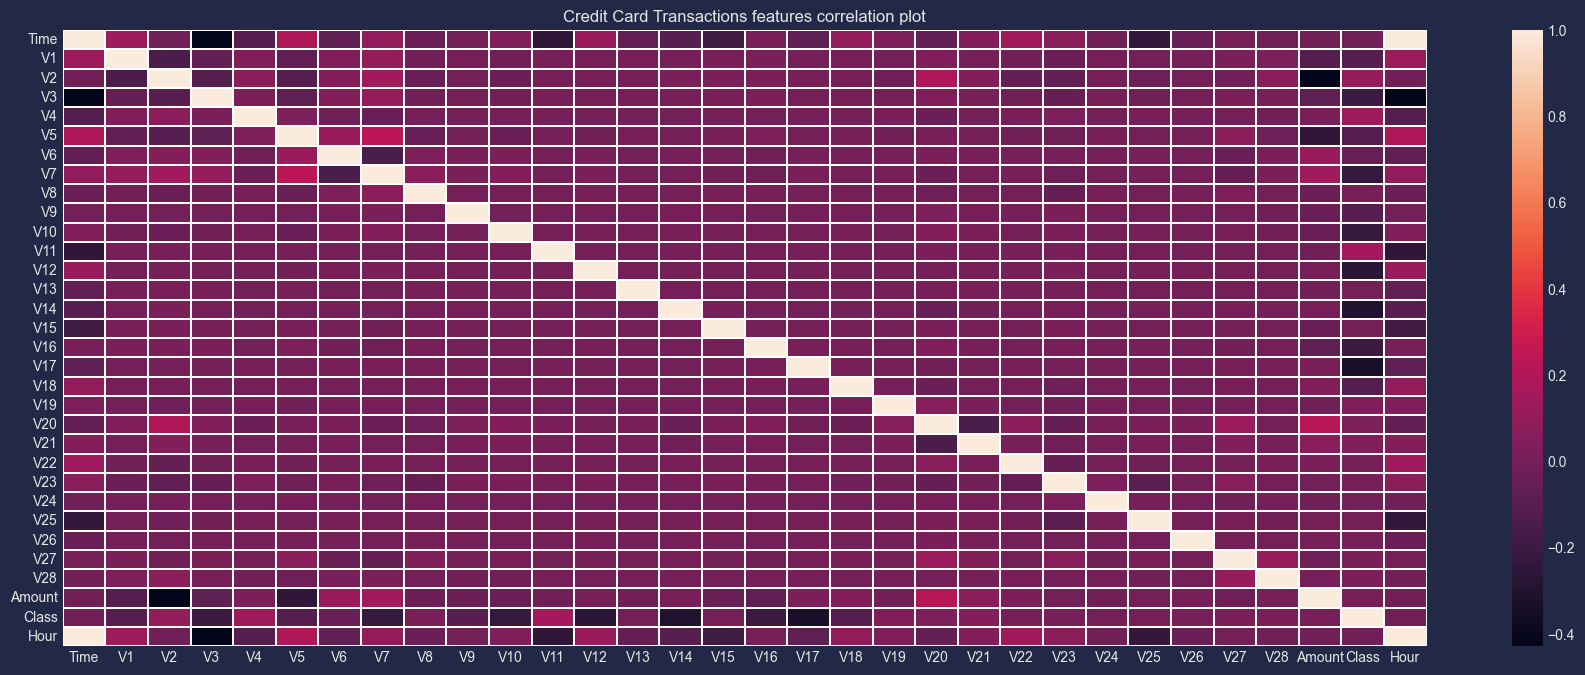

In [262]:
plt.figure()
plt.title('Credit Card Transactions features correlation plot')
corr = train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="rocket")
plt.show()

In [263]:
dict(corr['Amount'])

{'Time': -0.016124859087797632,
 'V1': -0.11166337451637676,
 'V2': -0.42835104721891465,
 'V3': -0.08088830228918813,
 'V4': 0.01676307418015521,
 'V5': -0.24592583240290172,
 'V6': 0.12096618446664896,
 'V7': 0.14485071625639234,
 'V8': -0.03671298187482016,
 'V9': -0.037681543646451515,
 'V10': -0.042148765800269536,
 'V11': -0.019065323322554065,
 'V12': 0.0029986669674362957,
 'V13': -0.018547646588799212,
 'V14': 0.011621424109468436,
 'V15': -0.04299445577660122,
 'V16': -0.07414670884067981,
 'V17': 0.01629973319499336,
 'V18': 0.03568196344016201,
 'V19': -0.01954039740639002,
 'V20': 0.21555316352986847,
 'V21': 0.06809941102595984,
 'V22': 0.01599790837666315,
 'V23': -0.004936028641073102,
 'V24': -0.01939595996490218,
 'V25': 0.00015135190809338598,
 'V26': 0.005460797085258593,
 'V27': -0.024541358452357477,
 'V28': 0.005437678267373331,
 'Amount': 1.0,
 'Class': 0.009088358880372642,
 'Hour': -0.01632638552820057}

In [264]:
dict(corr['Class'])


{'Time': -0.014603119995619852,
 'V1': -0.10969014753623244,
 'V2': 0.10592335466793941,
 'V3': -0.20004037481147718,
 'V4': 0.1358543560000859,
 'V5': -0.1093042963930563,
 'V6': -0.044559063306672184,
 'V7': -0.22420355772208087,
 'V8': 0.010434185361357352,
 'V9': -0.09795702457937468,
 'V10': -0.22336563950652202,
 'V11': 0.15661199239530968,
 'V12': -0.2649444364869369,
 'V13': -0.00712598376235251,
 'V14': -0.3045158571407281,
 'V15': -0.0032317809201974647,
 'V16': -0.20105500349397923,
 'V17': -0.33157576321286897,
 'V18': -0.11557353340490091,
 'V19': 0.03528582024442609,
 'V20': 0.025425578765214472,
 'V21': 0.047606784387980085,
 'V22': -0.0013768125093968058,
 'V23': 0.003694022076039747,
 'V24': -0.00581798250133717,
 'V25': 2.6807414490407345e-05,
 'V26': 0.0021847858707138195,
 'V27': 0.013340735969975778,
 'V28': 0.012958161378418943,
 'Amount': 0.009088358880372642,
 'Class': 1.0,
 'Hour': -0.014542400695502139}

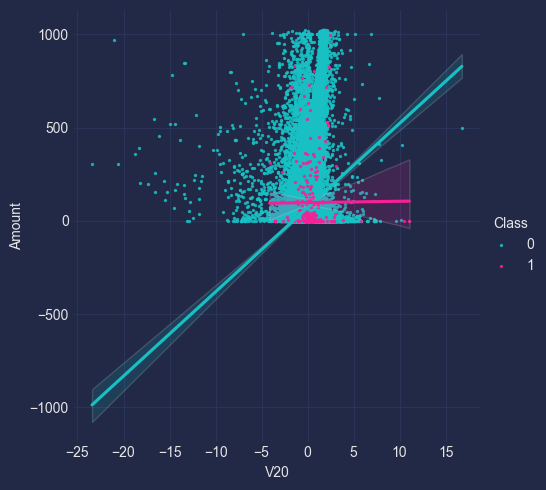

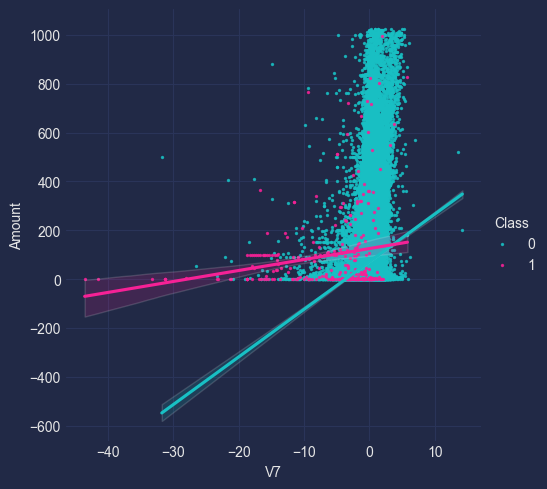

In [265]:
s = sns.lmplot(x='V20', y='Amount',data=train, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=train, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

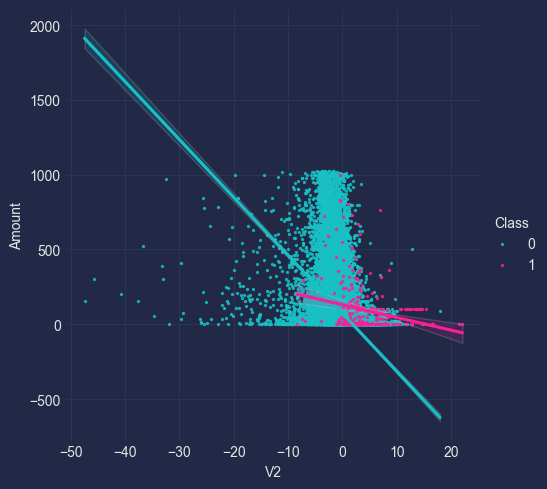

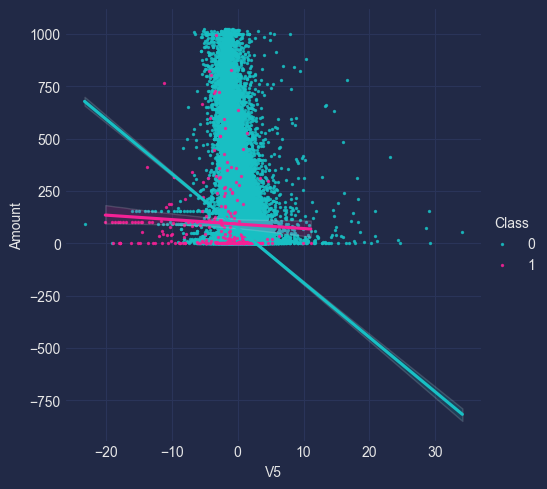

In [267]:
s = sns.lmplot(x='V2', y='Amount',data=train, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=train, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

<Figure size 2200x800 with 0 Axes>

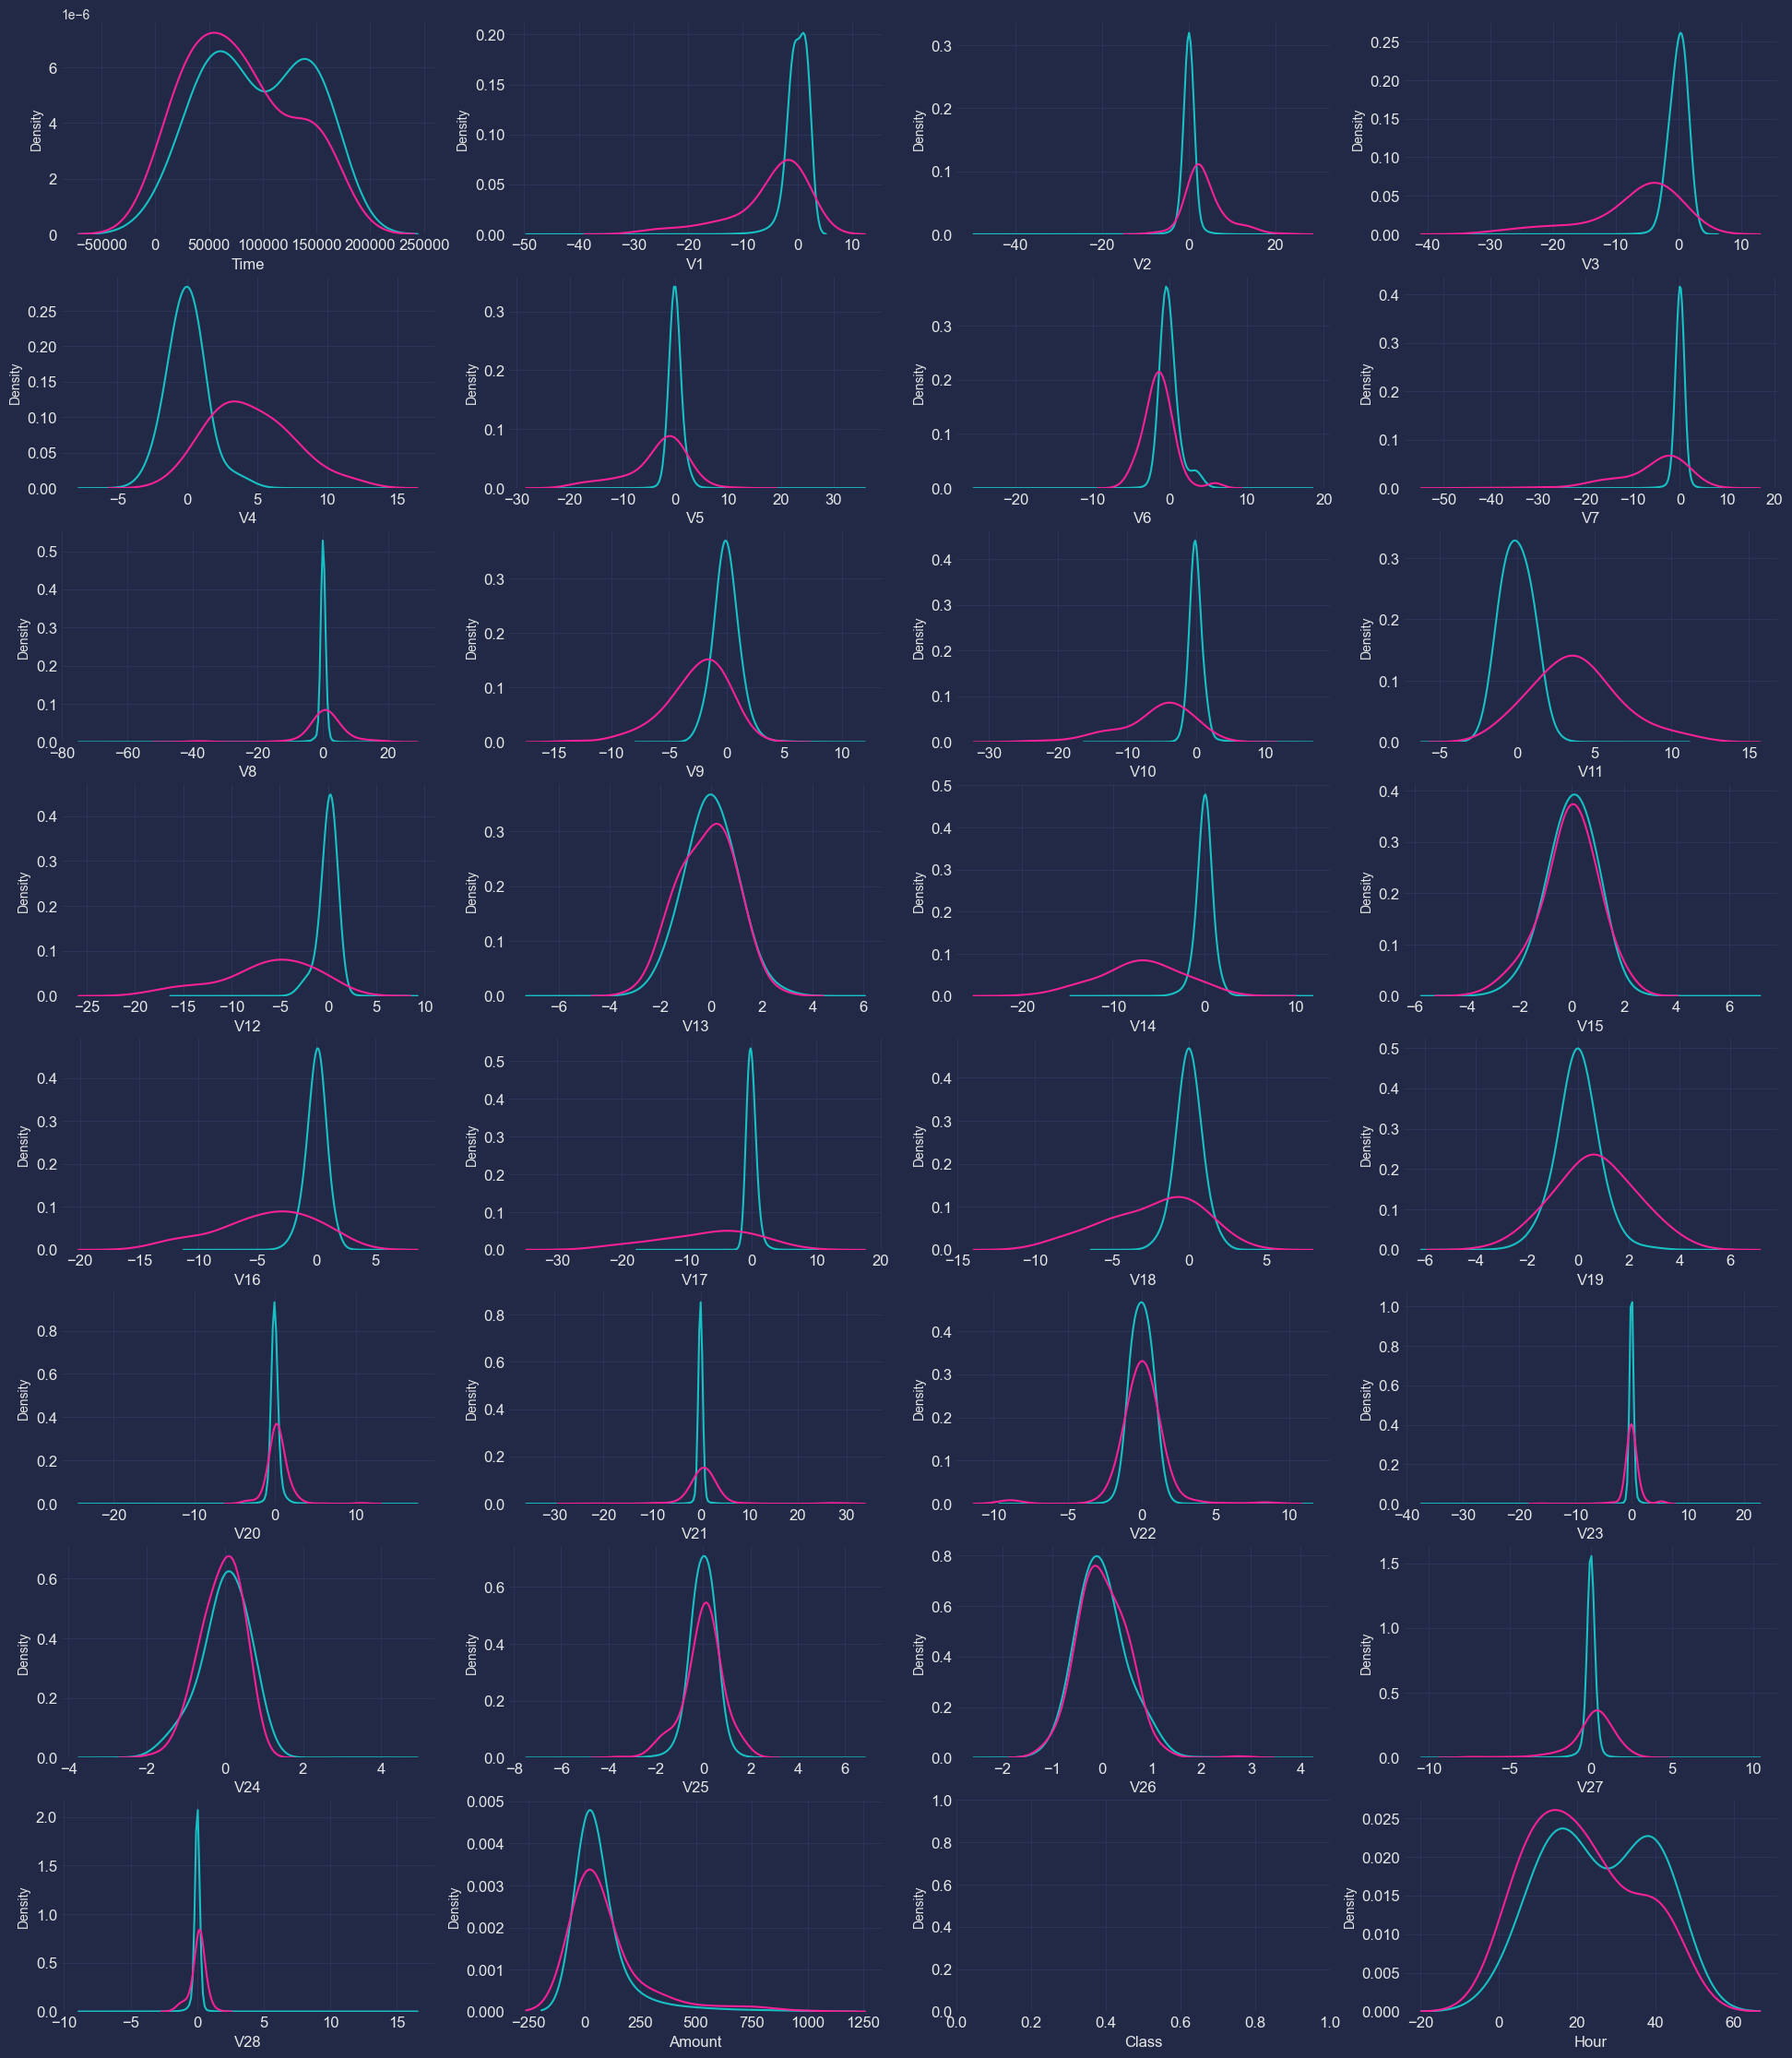

In [266]:
var = train.columns.values

i = 0
t0 = train.loc[train['Class'] == 0]
t1 = train.loc[train['Class'] == 1]


plt.figure()
fig, ax = plt.subplots(8,4,figsize=(24,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();